# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

from pprint import pprint

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count

print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


In [3]:
cities

['sataua',
 'ushibuka',
 'new norfolk',
 'valdivia',
 'tecpan',
 'puerto ayora',
 'busselton',
 'hobart',
 'bereda',
 'castro',
 'rikitea',
 'cherskiy',
 'punta arenas',
 'zeya',
 'albany',
 'lingyuan',
 'byron bay',
 'yomitan',
 'dudinka',
 'carnarvon',
 'rincon',
 'narasannapeta',
 'kapaa',
 'gobabis',
 'nanchang',
 'taolanaro',
 'tabou',
 'lensk',
 'butaritari',
 'talnakh',
 'lulea',
 'paamiut',
 'saldanha',
 'bluff',
 'mehamn',
 'yellowknife',
 'lata',
 'jamestown',
 'cape town',
 'tasiilaq',
 'east london',
 'lebu',
 'hermanus',
 'ushuaia',
 'otukpo',
 'phan rang',
 'hegang',
 'maceio',
 'avarua',
 'kodiak',
 'mataura',
 'belushya guba',
 'basoko',
 'coihaique',
 'haines junction',
 'tumannyy',
 'kloulklubed',
 'dunedin',
 'tual',
 'spirit river',
 'katsuura',
 'vestmannaeyjar',
 'husavik',
 'vaini',
 'moose factory',
 'bredasdorp',
 'chuy',
 'tura',
 'niamtougou',
 'poum',
 'villeta',
 'cayenne',
 'nakamura',
 'tias',
 'qaanaaq',
 'aripuana',
 'banda aceh',
 'dakar',
 'banganapal

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"

#"https://api.openweathermap.org/data/2.5/weather?"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather =  requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sataua
City not found. Skipping...
Processing Record 2 of Set 1 | ushibuka
Processing Record 3 of Set 1 | new norfolk
Processing Record 4 of Set 1 | valdivia
Processing Record 5 of Set 1 | tecpan
Processing Record 6 of Set 1 | puerto ayora
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | hobart
Processing Record 9 of Set 1 | bereda
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | cherskiy
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | zeya
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | lingyuan
Processing Record 17 of Set 1 | byron bay
Processing Record 18 of Set 1 | yomitan
City not found. Skipping...
Processing Record 19 of Set 1 | dudinka
Processing Record 20 of Set 1 | carnarvon
Processing Record 21 of Set 1 | rincon
Processing Record 22 of Set 1 | narasan

Processing Record 36 of Set 4 | bangui
Processing Record 37 of Set 4 | sao gabriel da cachoeira
Processing Record 38 of Set 4 | upata
Processing Record 39 of Set 4 | thompson
Processing Record 40 of Set 4 | gondanglegi
Processing Record 41 of Set 4 | port elizabeth
Processing Record 42 of Set 4 | airai
Processing Record 43 of Set 4 | tokat
Processing Record 44 of Set 4 | felipe carrillo puerto
Processing Record 45 of Set 4 | gouyave
Processing Record 46 of Set 4 | campechuela
Processing Record 47 of Set 4 | kurilsk
Processing Record 48 of Set 4 | afogados da ingazeira
Processing Record 49 of Set 4 | paradwip
City not found. Skipping...
Processing Record 0 of Set 5 | antofagasta
Processing Record 1 of Set 5 | springdale
Processing Record 2 of Set 5 | norman wells
Processing Record 3 of Set 5 | tchaourou
Processing Record 4 of Set 5 | kondinskoye
Processing Record 5 of Set 5 | kaseda
Processing Record 6 of Set 5 | kibala
Processing Record 7 of Set 5 | beidao
Processing Record 8 of Set 5 

Processing Record 25 of Set 8 | saint-augustin
Processing Record 26 of Set 8 | innisfail
Processing Record 27 of Set 8 | polyarnyy
Processing Record 28 of Set 8 | tete
Processing Record 29 of Set 8 | bermejo
Processing Record 30 of Set 8 | bury saint edmunds
City not found. Skipping...
Processing Record 31 of Set 8 | xining
Processing Record 32 of Set 8 | yunyang
Processing Record 33 of Set 8 | at-bashi
Processing Record 34 of Set 8 | jiguani
Processing Record 35 of Set 8 | solvychegodsk
Processing Record 36 of Set 8 | ewa beach
Processing Record 37 of Set 8 | shingu
Processing Record 38 of Set 8 | kawalu
Processing Record 39 of Set 8 | karratha
Processing Record 40 of Set 8 | obo
Processing Record 41 of Set 8 | mikhaylovka
Processing Record 42 of Set 8 | naze
Processing Record 43 of Set 8 | domoni
Processing Record 44 of Set 8 | bongandanga
Processing Record 45 of Set 8 | kadayanallur
Processing Record 46 of Set 8 | keti bandar
Processing Record 47 of Set 8 | banska stiavnica
Processi

Processing Record 11 of Set 12 | makat
Processing Record 12 of Set 12 | azimur
City not found. Skipping...
Processing Record 13 of Set 12 | arica
Processing Record 14 of Set 12 | grand gaube
Processing Record 15 of Set 12 | baker city
Processing Record 16 of Set 12 | kieta
Processing Record 17 of Set 12 | yunjinghong
City not found. Skipping...
Processing Record 18 of Set 12 | teguise
Processing Record 19 of Set 12 | charyshskoye
Processing Record 20 of Set 12 | sambava
Processing Record 21 of Set 12 | taltal
Processing Record 22 of Set 12 | vao
Processing Record 23 of Set 12 | abay
Processing Record 24 of Set 12 | kautokeino
Processing Record 25 of Set 12 | aguimes
Processing Record 26 of Set 12 | tabory
Processing Record 27 of Set 12 | armacao dos buzios
City not found. Skipping...
Processing Record 28 of Set 12 | marzuq
Processing Record 29 of Set 12 | balaipungut
Processing Record 30 of Set 12 | lebanon
Processing Record 31 of Set 12 | aneho
Processing Record 32 of Set 12 | opuwo
P

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Using required fields for the next steps:

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

# Show Record Count
city_data_df.count()

City          550
Lat           550
Lng           550
Max Temp      550
Humidity      550
Cloudiness    550
Wind Speed    550
Country       550
Date          550
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushibuka,32.1906,130.0228,50.67,77,86,11.16,JP,1675809157
1,new norfolk,-42.7826,147.0587,58.50,61,8,0.58,AU,1675808999
2,valdivia,-39.8142,-73.2459,80.69,53,0,1.90,CL,1675809157
3,tecpan,14.7623,-90.9947,65.89,47,40,5.59,GT,1675809157
4,puerto ayora,-0.7393,-90.3518,84.16,91,29,10.00,EC,1675809055


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushibuka,32.1906,130.0228,50.67,77,86,11.16,JP,1675809157
1,new norfolk,-42.7826,147.0587,58.50,61,8,0.58,AU,1675808999
2,valdivia,-39.8142,-73.2459,80.69,53,0,1.90,CL,1675809157
3,tecpan,14.7623,-90.9947,65.89,47,40,5.59,GT,1675809157
4,puerto ayora,-0.7393,-90.3518,84.16,91,29,10.00,EC,1675809055


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

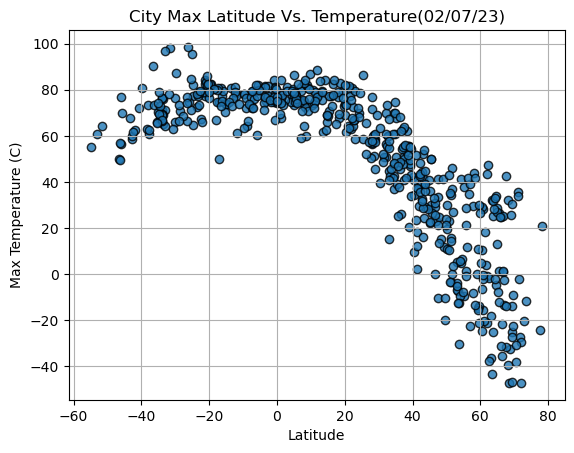

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats,max_temps,edgecolor="black", linewidth=1, marker="o",alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title("City Max Latitude Vs. Temperature(%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

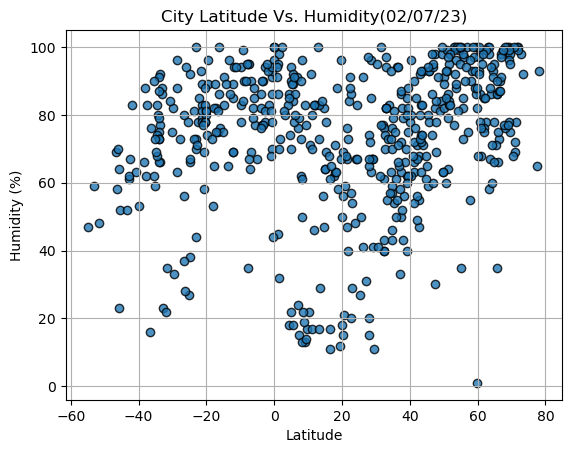

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats,
            humidity,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Humidity(%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

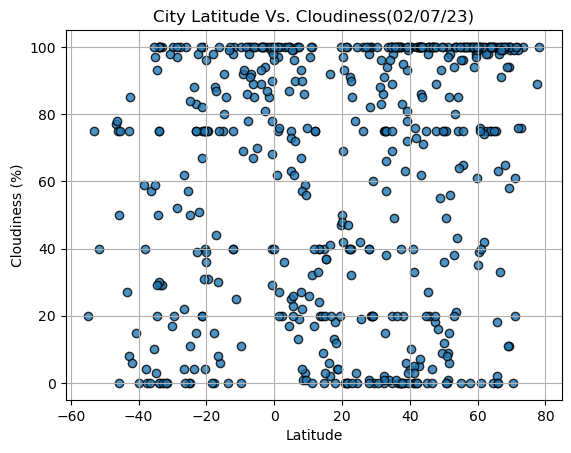

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats,
            cloudiness,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness(%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

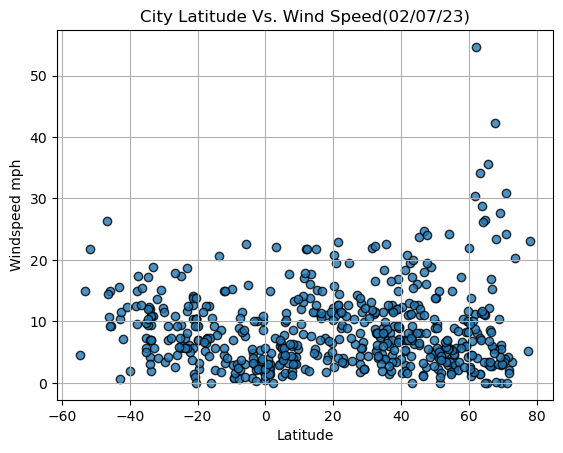

In [12]:
# Build scatter plot for latitude vs. Windspeed
plt.scatter(lats,
            wind_speed,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title("City Latitude Vs. Wind Speed(%s)" % time.strftime("%x"))
plt.ylabel("Windspeed mph")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def linear_regresion(x_values,y_values,title,text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
    regressValue = x_values * slope + intercept
    
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regressValue, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Title")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushibuka,32.1906,130.0228,50.67,77,86,11.16,JP,1675809157
3,tecpan,14.7623,-90.9947,65.89,47,40,5.59,GT,1675809157
7,bereda,43.2686,-7.5406,39.42,83,86,7.87,ES,1675809159
10,cherskiy,68.7500,161.3000,-32.31,98,100,5.50,RU,1675809159
12,zeya,53.7500,127.2667,-30.44,96,21,2.98,RU,1675809160


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,new norfolk,-42.7826,147.0587,58.50,61,8,0.58,AU,1675808999
2,valdivia,-39.8142,-73.2459,80.69,53,0,1.90,CL,1675809157
4,puerto ayora,-0.7393,-90.3518,84.16,91,29,10.00,EC,1675809055
5,busselton,-33.6500,115.3333,65.01,77,29,9.40,AU,1675809158
6,hobart,-42.8794,147.3294,60.06,62,75,10.36,AU,1675809158


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.8610334624769138


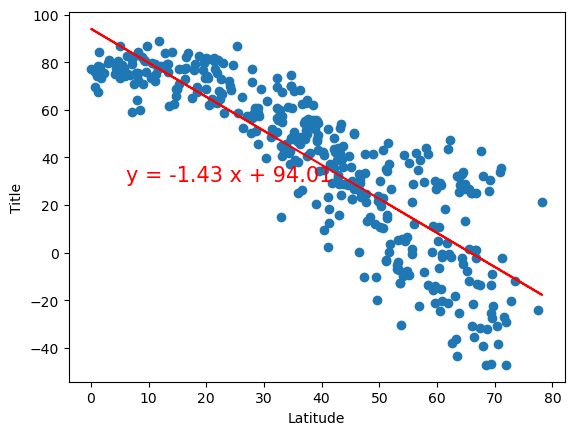

In [16]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
linear_regresion(x_values,y_values, 'Max Temp', (6,30))

The r-squared is: 0.3890545523757789


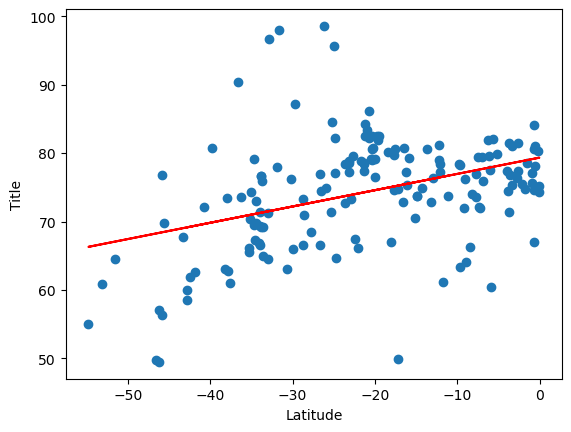

In [17]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
linear_regresion(x_values,y_values, 'Max Temp', (-30,40))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.38534322946764515


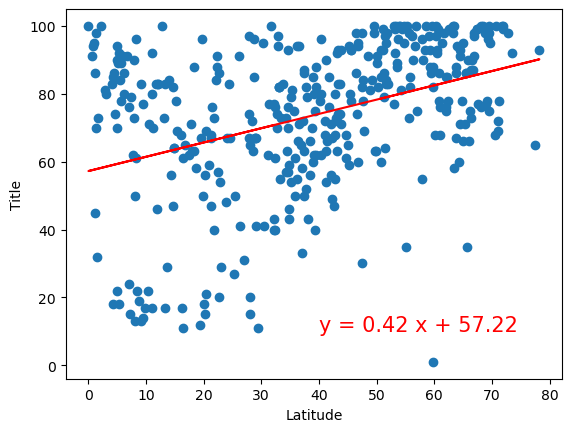

In [18]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
linear_regresion(x_values,y_values, 'Humidity', (40,10))

The r-squared is: 0.42869320378754466


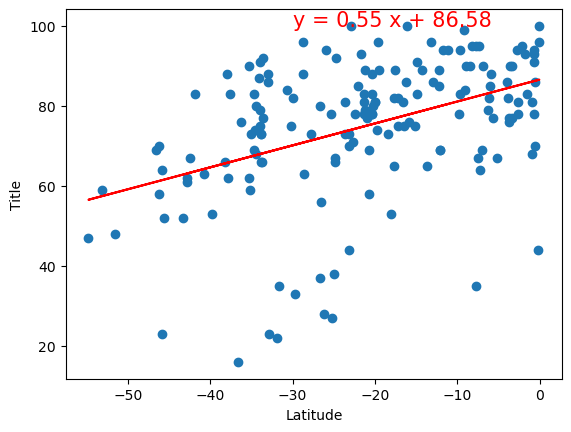

In [19]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
linear_regresion(x_values,y_values, 'Humidity', (-30,100))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.23875468367661315


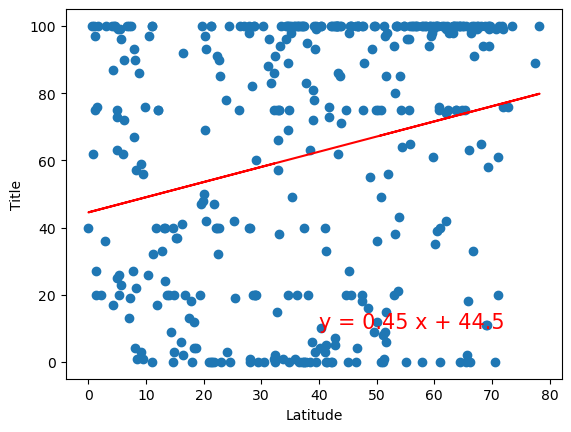

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
linear_regresion(x_values,y_values, 'Cloudiness', (40,10))

The r-squared is: 0.39679932012533314


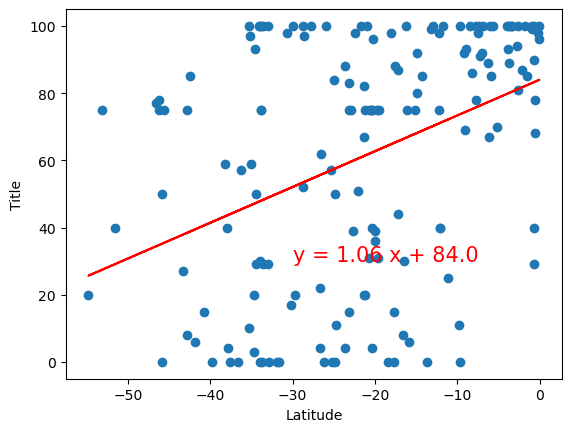

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
linear_regresion(x_values,y_values, 'Cloudiness', (-30,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.08094346609835093


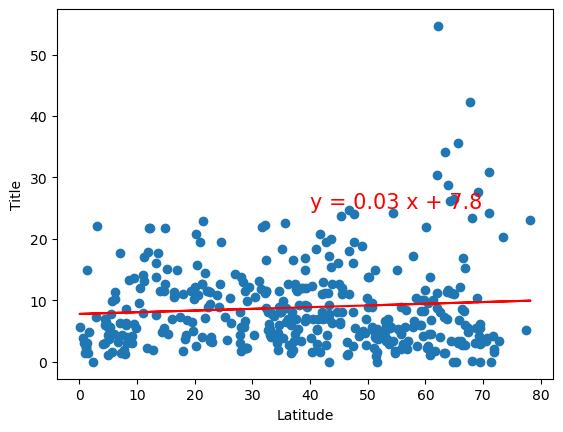

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Wind Speed"]
linear_regresion(x_values,y_values, 'Wind Speed', (40,25))

The r-squared is: -0.4042077498666397


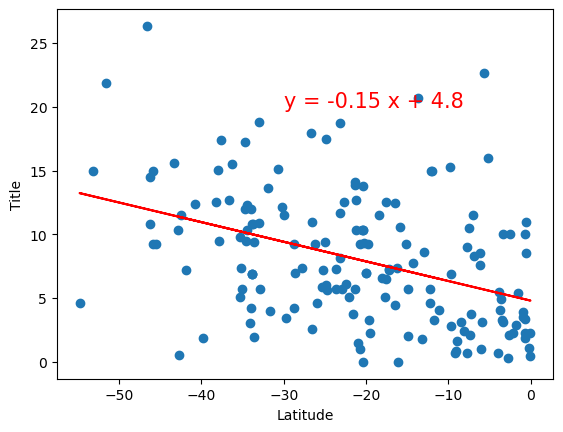

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Wind Speed"]
linear_regresion(x_values,y_values, 'Wind Speed', (-30,20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE